# Get polygons and images from GBDX

Some of the functions used in this notebook can be found in the nice_functions.py file in the Functions folder

In [178]:
### home made functions
import nice_functions as nf

reload(nf)

import get_OSM_polygons as getOSM

reload(getOSM)

### other libraries

import pandas as pd
import numpy as np

from shapely.ops import transform
from shapely.geometry import mapping, Polygon, box, shape

import matplotlib.pyplot as plt
%matplotlib inline

import fiona

import pickle

from gbdxtools import Interface
from gbdxtools.task import env
from gbdxtools import CatalogImage

gbdx = Interface()



In [179]:
city = 'amsterdam'



In [180]:

with open('/home/gremlin/GGCW_tools_git/Pickle/selection_objects_all_{}.pickle'.format(city), 'rb') as handle:
    selection_all = pickle.load(handle)
    
    
with open('/home/gremlin/GGCW_tools_git/Pickle/geom_list_selection_all{}.pickle'.format(city), 'rb') as handle:
    geom_list_selection_all = pickle.load(handle)
    
    
with open('/home/gremlin/GGCW_tools_git/Pickle/project_utm_{}.pickle'.format(city), 'rb') as handle:
    project_utm = pickle.load(handle)
    
    
with open('/home/gremlin/GGCW_tools_git/Pickle/project_wgs_{}.pickle'.format(city), 'rb') as handle:
    project_wgs = pickle.load(handle)
    
with open('/home/gremlin/GGCW_tools_git/Pickle/UTM_EPSG_code_{}.pickle'.format(city), 'rb') as handle:
    UTM_EPSG_code = pickle.load(handle)

#### set variables


In [181]:

dict_type = {'Forest': 1,'Wood': 1,'Nature Reserve': 1,'Wetland': 3, 'Grass': 2, 'Farmland': 2, 'Water': 3, 'Building': 4, 'Theatre': 0}


buffer_size =  -10

label_all = np.array([])
data_all = np.array([])





##### Get image data for all polygons, Reproject WGS polygon to UTM polygon and apply mask, extract data to dataframe for use in machine learning algorithms


-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-103828726 is good object: 0
2017-05-27T11:00:32.625Z
104001002BC52E00
Forest


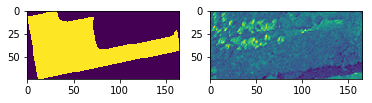

(12210,)
(8, 12210)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-55156648 is good object: 1
2017-08-05T10:49:11.925Z
103001006FD63D00
Forest


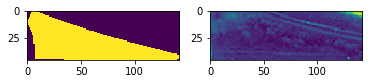

(18742,)
(8, 18742)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-75639006 is good object: 2
2017-08-05T10:49:11.925Z
103001006FD63D00
Forest


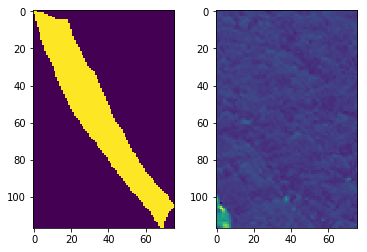

(27634,)
(8, 27634)
-----------------------------------------

Fetching Image... 2 tiles
image for OSM-way-75637070 is good object: 3
2017-08-05T10:49:11.925Z
103001006FD63D00
Forest


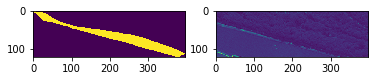

(75394,)
(8, 75394)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-75638794 is good object: 4
2016-05-06T11:18:19.009Z
103005004DF8CF00
Forest


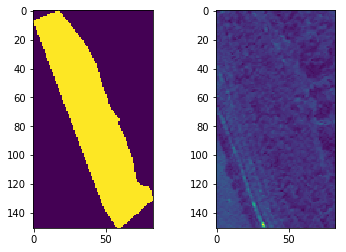

(87927,)
(8, 87927)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-100424440 is good object: 5
2016-09-25T10:40:14.674Z
103001005EA2BC00
Forest


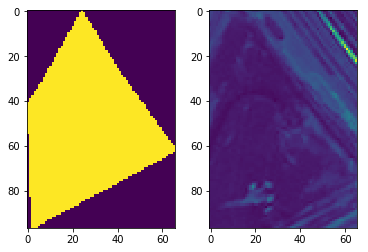

(94329,)
(8, 94329)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-103824458 is good object: 6
2017-05-27T11:00:32.625Z
104001002BC52E00
Forest


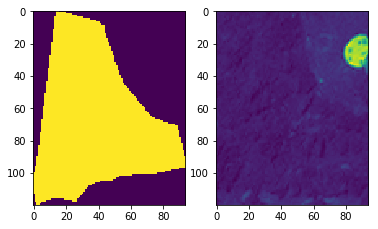

(105609,)
(8, 105609)
-----------------------------------------

is multipolygon object: 7

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-103827394 is good object: 8
2017-05-27T11:00:32.625Z
104001002BC52E00
Forest


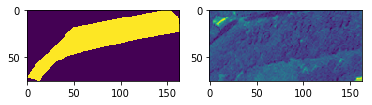

(117997,)
(8, 117997)
-----------------------------------------

is multipolygon object: 9

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-99890915 is good object: 10
2016-05-06T11:18:19.009Z
103005004DF8CF00
Forest


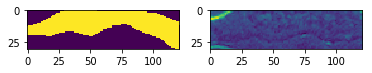

(121748,)
(8, 121748)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-75637355 is good object: 11
2017-08-05T10:49:11.925Z
103001006FD63D00
Forest


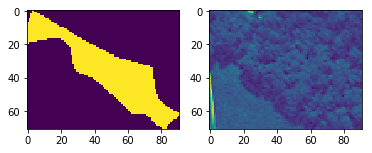

(128209,)
(8, 128209)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-75639184 is good object: 12
2016-05-12T10:57:33.375Z
103005004DF97900
Forest


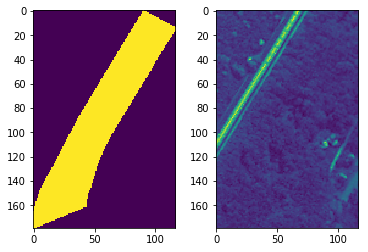

(149152,)
(8, 149152)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-75637103 is good object: 13
2016-05-12T10:57:33.375Z
103005004DF97900
Forest


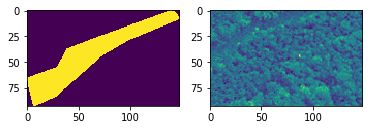

(162916,)
(8, 162916)
-----------------------------------------

is multipolygon object: 14

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-75637998 is good object: 15
2016-05-06T11:18:19.009Z
103005004DF8CF00
Forest


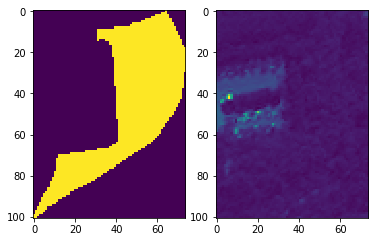

(170390,)
(8, 170390)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-75637827 is good object: 16
2016-05-06T11:18:19.009Z
103005004DF8CF00
Forest


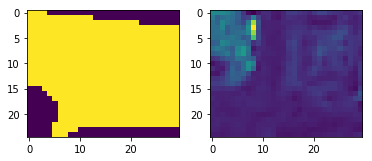

(171140,)
(8, 171140)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-75539537 is good object: 17
2017-08-05T10:49:11.925Z
103001006FD63D00
Forest


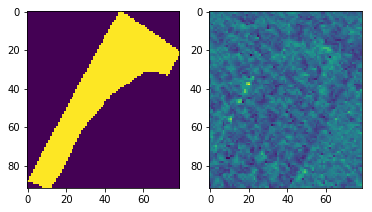

(178408,)
(8, 178408)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-75637871 is good object: 18
2016-05-12T10:57:33.375Z
103005004DF97900
Forest


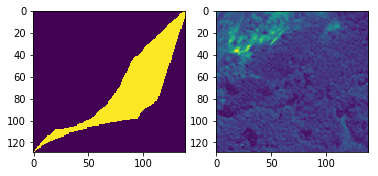

(196339,)
(8, 196339)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-74408544 is good object: 19
2016-05-06T11:18:19.009Z
103005004DF8CF00
Grass


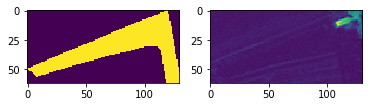

(204399,)
(8, 204399)
-----------------------------------------

Fetching Image... 2 tiles
image defective
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-103855291 is good object: 21
2017-08-05T10:49:11.925Z
103001006FD63D00
Grass


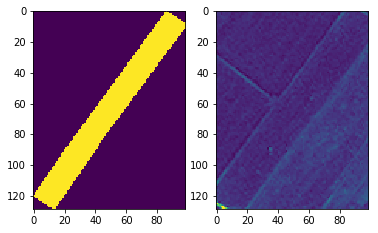

(217170,)
(8, 217170)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-74410458 is good object: 22
2016-05-06T11:18:19.009Z
103005004DF8CF00
Grass


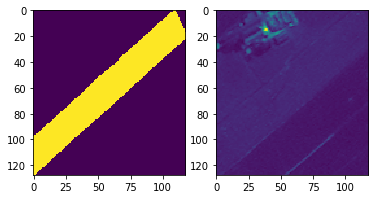

(232274,)
(8, 232274)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-74411640 is good object: 23
2016-05-06T11:18:19.009Z
103005004DF8CF00
Grass


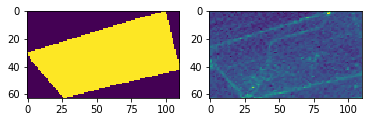

(239204,)
(8, 239204)
-----------------------------------------

is multipolygon object: 24

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-385028004 is good object: 25
2017-08-05T10:49:11.925Z
103001006FD63D00
Grass


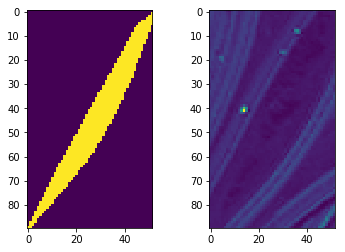

(243884,)
(8, 243884)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-75134170 is good object: 26
2017-08-05T10:49:11.925Z
103001006FD63D00
Grass


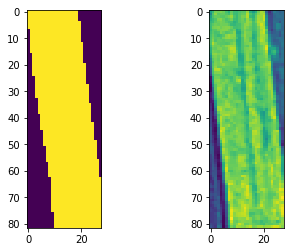

(246180,)
(8, 246180)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-74601918 is good object: 27
2017-08-05T10:49:11.925Z
103001006FD63D00
Grass


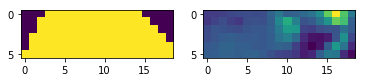

(246294,)
(8, 246294)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-75663005 is good object: 28
2015-10-02T11:19:16.016Z
1030050045F94600
Grass


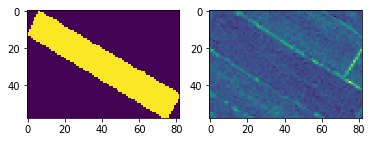

(251050,)
(8, 251050)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-74410017 is good object: 29
2016-05-06T11:18:19.009Z
103005004DF8CF00
Grass


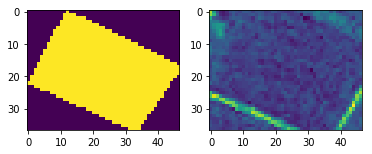

(252789,)
(8, 252789)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-100302215 is good object: 30
2015-10-02T11:19:16.016Z
1030050045F94600
Grass


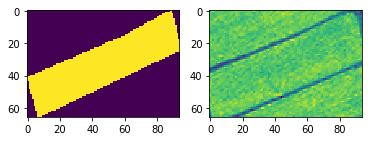

(258993,)
(8, 258993)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-374820285 is good object: 31
2017-08-05T10:49:11.925Z
103001006FD63D00
Grass


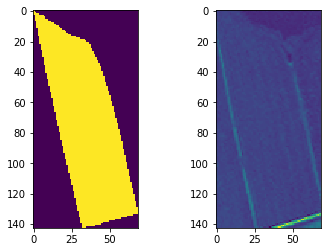

(268860,)
(8, 268860)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-99891236 is good object: 32
2016-05-06T11:18:19.009Z
103005004DF8CF00
Grass


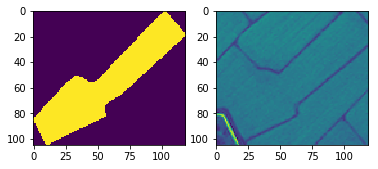

(281355,)
(8, 281355)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-101767697 is good object: 33
2017-05-27T11:00:32.625Z
104001002BC52E00
Grass


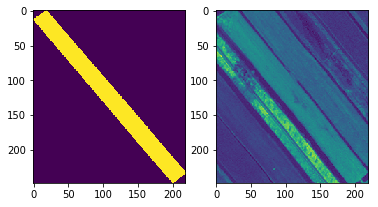

(335667,)
(8, 335667)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-100301588 is good object: 34
2015-10-02T11:19:16.016Z
1030050045F94600
Grass


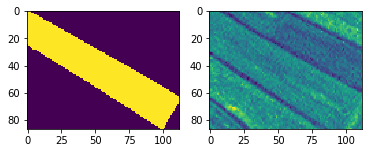

(345411,)
(8, 345411)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-100301597 is good object: 35
2015-10-02T11:19:16.016Z
1030050045F94600
Grass


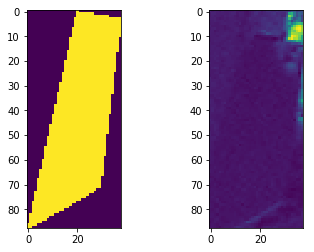

(348755,)
(8, 348755)
-----------------------------------------

is multipolygon object: 36

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-74407574 is good object: 37
2016-05-06T11:18:19.009Z
103005004DF8CF00
Grass


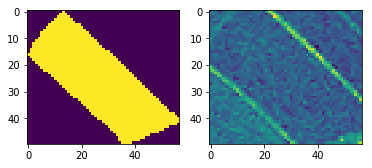

(351605,)
(8, 351605)
-----------------------------------------

is multipolygon object: 38

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-75133407 is good object: 39
2017-08-05T10:49:11.925Z
103001006FD63D00
Water


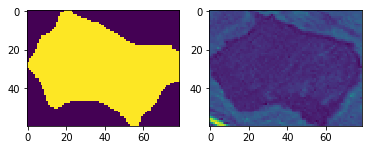

(356345,)
(8, 356345)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-75637495 is good object: 40
2016-05-12T10:57:33.375Z
103005004DF97900
Water


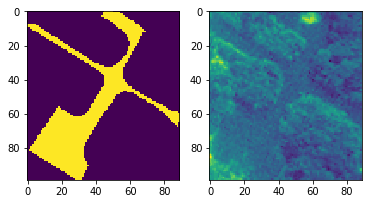

(365156,)
(8, 365156)
-----------------------------------------

is multipolygon object: 41

-----------------------------------------

Fetching Image... 2 tiles
image for OSM-way-75637198 is good object: 42
2016-05-06T11:18:19.009Z
103005004DF8CF00
Water


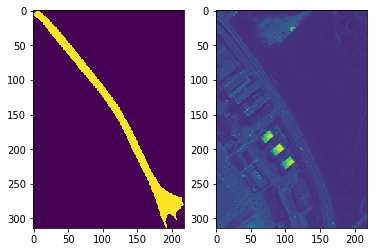

(433608,)
(8, 433608)
-----------------------------------------

Fetching Image... 2 tiles
image for OSM-way-474211599 is good object: 43
2017-08-05T10:49:11.925Z
103001006FD63D00
Water


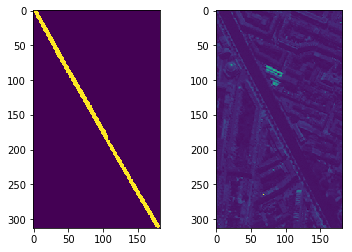

(490574,)
(8, 490574)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-74079589 is good object: 44
2017-08-05T10:49:11.925Z
103001006FD63D00
Water


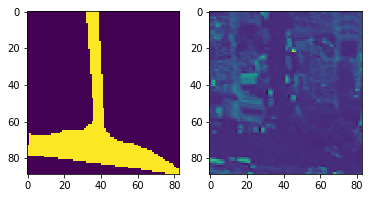

(497961,)
(8, 497961)
-----------------------------------------

is multipolygon object: 45

-----------------------------------------

is multipolygon object: 46

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-55145231 is good object: 47
2017-05-27T11:00:32.625Z
104001002BC52E00
Water


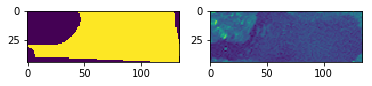

(503991,)
(8, 503991)
-----------------------------------------

is multipolygon object: 48

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-74600910 is good object: 49
2017-08-05T10:49:11.925Z
103001006FD63D00
Water


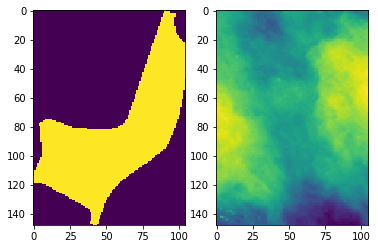

(519531,)
(8, 519531)
-----------------------------------------

Fetching Image... 2 tiles
image for OSM-way-75745010 is good object: 50
2017-08-05T10:49:11.925Z
103001006FD63D00
Water


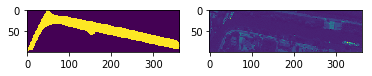

(555369,)
(8, 555369)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-74080241 is good object: 51
2017-08-05T10:49:11.925Z
103001006FD63D00
Water


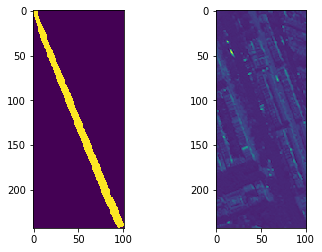

(579912,)
(8, 579912)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-67716477 is good object: 52
2017-08-05T10:49:11.925Z
103001006FD63D00
Water


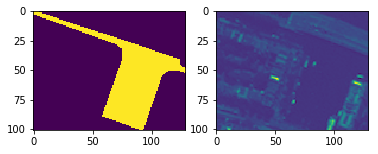

(592941,)
(8, 592941)
-----------------------------------------

is multipolygon object: 53

-----------------------------------------

is multipolygon object: 54

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-55343279 is good object: 55
2017-08-05T10:49:11.925Z
103001006FD63D00
Water


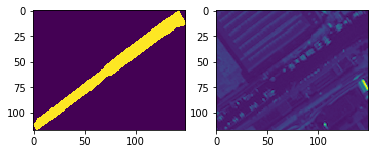

(610374,)
(8, 610374)
-----------------------------------------

is multipolygon object: 56

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-57854279 is good object: 57
2017-05-27T11:00:32.625Z
104001002BC52E00
Building


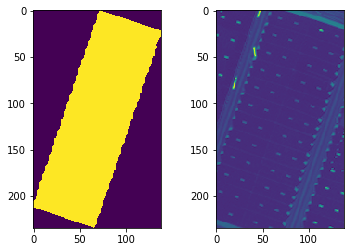

(642804,)
(8, 642804)
-----------------------------------------

is multipolygon object: 58

-----------------------------------------

is multipolygon object: 59

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-57866786 is good object: 60
2017-08-05T10:49:11.925Z
103001006FD63D00
Building


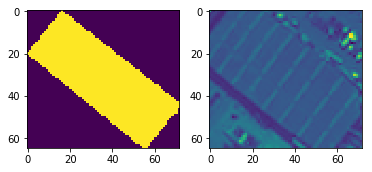

(647484,)
(8, 647484)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-23483479 is good object: 61
2017-08-05T10:49:11.925Z
103001006FD63D00
Building


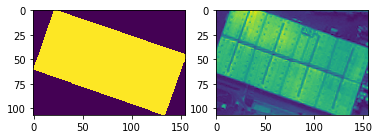

(664069,)
(8, 664069)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-276272968 is good object: 62
2017-08-05T10:49:11.925Z
103001006FD63D00
Building


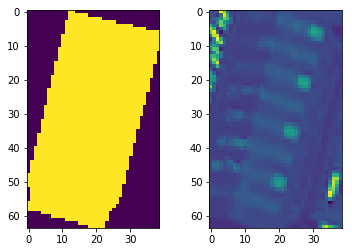

(666565,)
(8, 666565)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-57866329 is good object: 63
2017-08-05T10:49:11.925Z
103001006FD63D00
Building


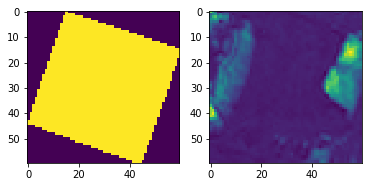

(670165,)
(8, 670165)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-280657737 is good object: 64
2017-08-05T10:49:11.925Z
103001006FD63D00
Building


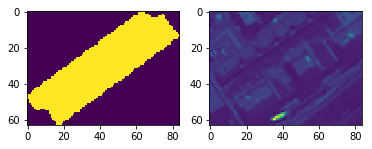

(675457,)
(8, 675457)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-274415298 is good object: 65
2017-05-27T11:00:32.625Z
104001002BC52E00
Building


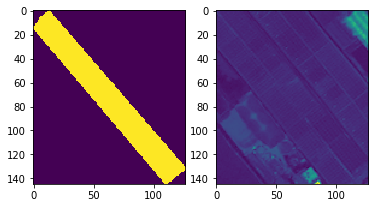

(693872,)
(8, 693872)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-278868745 is good object: 66
2017-08-05T10:49:11.925Z
103001006FD63D00
Building


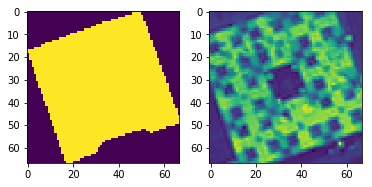

(698361,)
(8, 698361)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-269056230 is good object: 67
2017-08-05T10:49:11.925Z
103001006FD63D00
Building


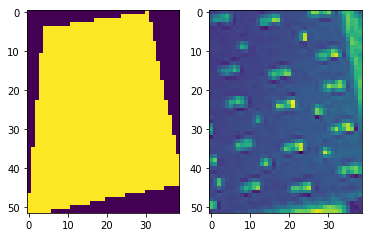

(700389,)
(8, 700389)
-----------------------------------------

is multipolygon object: 68

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-269243115 is good object: 69
2016-05-12T10:57:33.375Z
103005004DF97900
Building


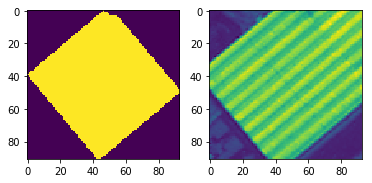

(708852,)
(8, 708852)


In [182]:

################ this takes some time


from PIL import Image, ImageDraw
import copy
import numpy as np

# load multipolygon type from pickle for check
multipolygon_type = pickle.load( open( "/home/gremlin/GGCW_tools_git/Pickle/multipolygon_type.p", "rb" ) )
        
for objects in selection_all.index:
    
    print '-----------------------------------------\n'
    ### setting a buffer can remove the polygon or make it into a multipolygon, both are unusable so check if this is the case
    park_utm = transform(project_utm, geom_list_selection_all[objects])  # apply projection
    
    
    # perform check # get x y coordinates of polygon and set a buffer if polygon is large enough
    if (type(park_utm.buffer(buffer_size)) == multipolygon_type) | (park_utm.buffer(buffer_size).area == 0):
        
        message = "is multipolygon"
        
        
        print message + ' object: ' + str(objects) +'\n'
    
    else: 
        
        x,y = park_utm.buffer(buffer_size).exterior.xy

        park_buffer_wgs = transform(project_wgs,park_utm.buffer(buffer_size))  # apply projection  


        # get wgs projected x,y coordinates and create bounding box for image aquisition
        x_wgs,y_wgs = park_buffer_wgs.exterior.xy
        
        bbox_park_area_float = min(x_wgs), min(y_wgs), max(x_wgs), max(y_wgs)

        bbox_park_area = str([min(x_wgs), min(y_wgs), max(x_wgs), max(y_wgs)])

        bbox_park_area_str = nf.listToStringWithoutBrackets(bbox_park_area)
        

        # convert bounding box to well known format usable by GBDX tools
        bbox_wkt = box(*bbox_park_area_float).wkt


        selection_images = nf.image_query_check(bbox_wkt,park_utm,buffer_size,multipolygon_type,project_wgs,x_wgs,y_wgs)

        if not selection_images.empty:
            # set park bounding box 
            bbox = env.inputs.get('bbox', bbox_park_area_str)

            # set catalog id from selection
            catalog_id = env.inputs.get('catalog_id', selection_images.id[0])

            # collect image
            image = CatalogImage(catalog_id, band_type="MS", bbox=map(float, bbox.split(",")),
                                 proj=UTM_EPSG_code,pansharpen=False)


            #create array from GBDX image
            image_array = image[:,:,:].read()

            # get second band to see if image is defective (some images show only black)
            # use image if not defective, otherwise 
            if (image_array.size == 0):
                
                print('no image')
            
            elif (image_array[1,:,:].min() != 0) :
                
                
                print 'image for ' + selection_all.OSM_id[objects] + ' is good object: ' + str(objects )
                print image.ipe_metadata["image"]["acquisitionDate"]
                print image.cat_id
                print selection_all.item_type[objects]


                # resize polygon and plot polygon over image
                # subtract minimal values from utm polygon x and y to set 0,0 point as start 
                x1 = np.subtract(x, min(x))
                y1 = np.subtract(y, min(y))

                # devide the x and y coordinate of the polygon by the size of the image to match both sizes 
                x2 = np.divide(x1,max(x1)/image.shape[2])
                y2 = np.divide(y1,max(y1)/image.shape[1])


                n_bands, rows, cols  = image.shape

                # calculate total cells for each class by masking and setting pixel values to 1

                # create sequence of edited x and y coordinates, widht and heigth  for use in ImageDraw function
                polygon = [(x2[i], y2[i]) for i in range(len(x2))]
                width = image.shape[2]
                height = image.shape[1]
                                                                   
                # convert polygon coordinates to raster/array values using ImageDraw
                img = Image.new('L', (width, height), 0)
                ImageDraw.Draw(img).polygon(polygon, fill=dict_type[selection_all.item_type[objects]])
                # convert image to array and set as mask
                mask = np.array(img)


                # flip the array for matching with the mask array
                image_array_flipped = np.fliplr(image_array[:,:,:])
                reshaped_data = image_array_flipped.reshape(8,(rows*cols))
                reshaped_label = mask.reshape(1,(rows*cols))
                
                # check if this is the first iteration, if so add the first data set otherwise:
                # append the new image data to the other data
                if data_all.size == 0:
                    
                    data_all = reshaped_data 
                    
                else: 
                    
                    data_all = np.concatenate((data_all,reshaped_data), axis = 1)
                
                label_all = np.append(label_all,reshaped_label)
                
                # Two subplots, the axes array is 1-d
                f, axarr = plt.subplots(1,2)
                axarr[0].imshow(mask)
                axarr[1].imshow(image_array_flipped[1])
                
                
                plt.show()
                
#                 plt.imshow(mask)
#                 plt.show()
                
                print label_all.shape
                print data_all.shape
             
                
            else:
                
                print 'image defective' 
                # move to next without doing analysis

        else:

            print 'no image' 
            # move to next without doing analysis
            
            
            
################ this takes a long time


In [183]:
image_array.size == 0

False

In [184]:
image

dask.array<getitem, shape=(8, 91, 93), dtype=float32, chunksize=(8, 91, 22)>

In [185]:
### Remove pixels without class

label_all_no0 = label_all[label_all != 0]
data_all_no0 = data_all[:,label_all != 0]


print label_all.shape
print data_all.shape

print label_all_no0.shape
print data_all_no0.shape

(708852,)
(8, 708852)
(182963,)
(8, 182963)


In [186]:
with open('/home/gremlin/GGCW_tools_git/Pickle/label_all_{}.pickle'.format(city), 'wb') as handle:
    pickle.dump(label_all_no0, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    
with open('/home/gremlin/GGCW_tools_git/Pickle/data_all_{}.pickle'.format(city), 'wb') as handle:
    pickle.dump(data_all_no0, handle, protocol=pickle.HIGHEST_PROTOCOL)